<h1><center> Machine Learning with Iris Dataset </center></h1>

<img src="https://programmersvideo.files.wordpress.com/2019/04/6df77-1pqtsamtp00_zp4ytmnyzsg.png" width="400" height="500">
<img src="https://pcictx.org/images/blog/Workflow.png" width="800" height="300">

#### The iris dataset contains the following data
            50 samples of 3 different species of iris (150 samples total)
            Measurements: sepal length, sepal width, petal length, petal width
            
To download, <a href="https://www.kaggle.com/uciml/iris/data#">click here</a>

<img src="https://miro.medium.com/max/289/0*1lgB-Yqej6VPER00">
<img src="https://miro.medium.com/max/608/0*rhP_m_pskOF_MUad">

### Reading the data

In [92]:
import pandas as pd
import numpy as np

In [93]:
#Lets read the data from csv
Iris_data = pd.read_csv("Iris.csv")

#This return us first few rows of dataframe
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
#let's get random 10 samples from data
Iris_data.sample(n=10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
66,67,5.6,3.0,4.5,1.5,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica
7,8,5.0,3.4,1.5,0.2,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
42,43,4.4,3.2,1.3,0.2,Iris-setosa
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
143,144,6.8,3.2,5.9,2.3,Iris-virginica


### Understanding the data

In [95]:
#Removing the ID column as does not add much value to data and further processing
Iris_data.drop(["Id"], axis = 1, inplace = True)
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [96]:
Iris_data.shape
#this means, we are having 150 rows and 5 columns in our data

(150, 5)

In [97]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [98]:
#All the data in all the columns is non-null => No headache of handling missing data :)

In [99]:
#Iris data set is a balanced dataset i.e. we have equal number of entries for all 3 species

In [100]:
Iris_data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [101]:
Iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Analysing the data visually

In [102]:
#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

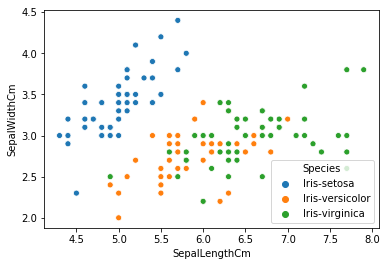

In [103]:
#lets plot a scatter plot between sepal length and Sepal width
sns.scatterplot(x = Iris_data['SepalLengthCm'], y = Iris_data['SepalWidthCm'], hue = Iris_data['Species'])
plt.show()

In [104]:
#from the above plot, it is clear that setosa is clearly distinguishable from other two species

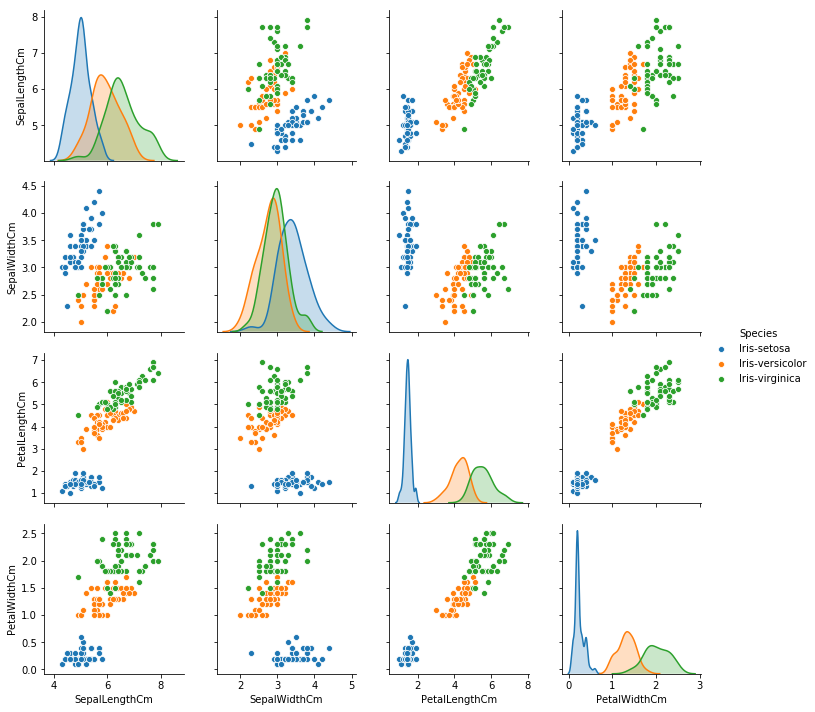

In [105]:
#Let's see the reltionship between multiple columns of data at one go
sns.pairplot(Iris_data, hue = 'Species', diag_kind = "kde", kind = "scatter")
plt.show()

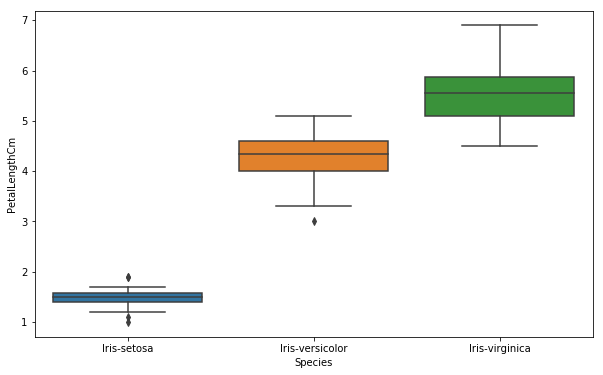

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "Species", y = "PetalLengthCm", data = Iris_data)
plt.show()



### BoxPlot explination
<img src="https://www.researchgate.net/profile/Javier_Lopez_Sanz/publication/328818609/figure/fig3/AS:717420608118791@1548057810508/Example-of-a-box-and-whisker-plot-for-a-normal-distribution-Classification-intervals.ppm">

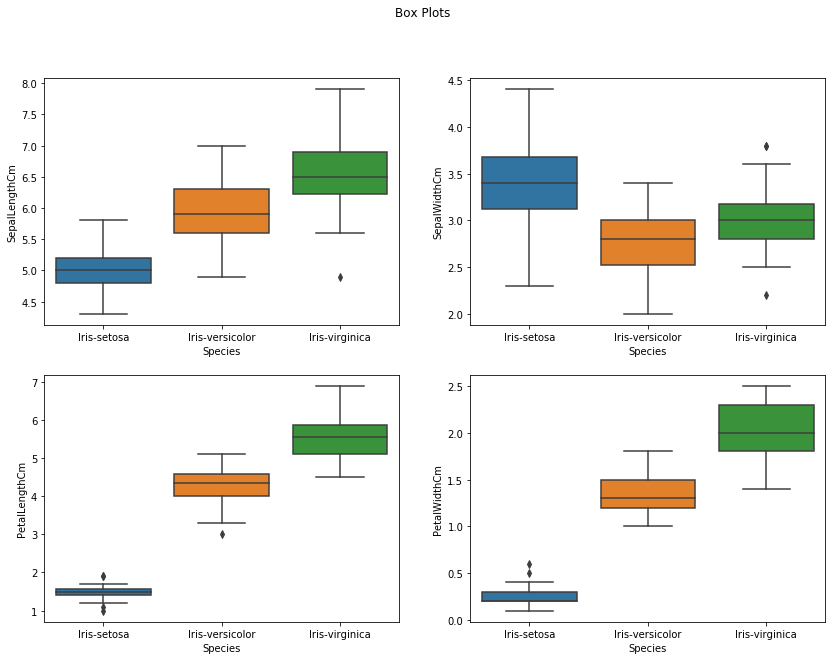

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.boxplot(x = "Species", y = "SepalLengthCm", data = Iris_data, ax=axes[0][0])
sns.boxplot(x = "Species", y = "SepalWidthCm",  data = Iris_data, ax=axes[0][1])
sns.boxplot(x = "Species", y = "PetalLengthCm", data = Iris_data, ax=axes[1][0])
sns.boxplot(x = "Species", y = "PetalWidthCm",  data = Iris_data, ax=axes[1][1])

fig.suptitle('Box Plots')
plt.show()

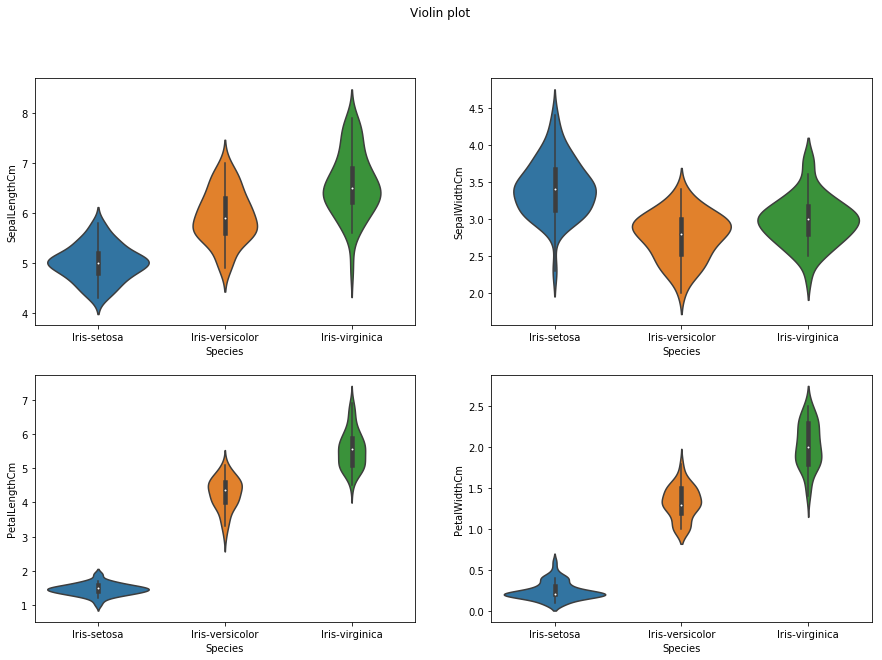

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

#SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm
sns.violinplot(x = "Species", y = "SepalLengthCm", data = Iris_data, ax=axes[0][0])
sns.violinplot(x = "Species", y = "SepalWidthCm", data = Iris_data, ax=axes[0][1])
sns.violinplot(x = "Species", y = "PetalLengthCm", data = Iris_data, ax=axes[1][0])
sns.violinplot(x = "Species", y = "PetalWidthCm", data = Iris_data, ax=axes[1][1])

fig.suptitle('Violin plot')
plt.show()

## Applying the algorithm

In [109]:
# Importing metrics for evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [110]:
# Seperating the data into dependent and independent variables
X = Iris_data.iloc[:, :-1].values
y = Iris_data.iloc[:, -1].values

In [111]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [112]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [113]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## LogisticRegression

In [114]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [115]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print("******")
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30

******
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


#### Confustion Matrix demo
<img src="https://i.stack.imgur.com/Rz5ol.jpg">

In [116]:
sample_y_true = ['Cat', 'Dog', 'Rabbit', 'Cat', 'Cat', 'Rabbit']
sample_y_pred = ['Dog', 'Dog', 'Rabbit', 'Dog', 'Dog', 'Rabbit']

classes=['Cat', 'Dog', 'Rabbit']
confusion_matrix(sample_y_true, sample_y_pred, labels=classes)

array([[0, 3, 0],
       [0, 1, 0],
       [0, 0, 2]], dtype=int64)

In [117]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


### Naive Bayes

In [118]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [119]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print("****")
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

    avg / total       0.97      0.97      0.97        30

****
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [120]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.9666666666666667


### Support Vector Machine

In [121]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [122]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print("*****")
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

*****
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [123]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


### K-Nearest Neighbours

In [124]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [125]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print("****")
print(confusion_matrix(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

****
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [126]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


### Conclusion
In ML, there is no specific model or an algorithm which can give 100% result to every single dataset. 
We need to understand the data before we apply any algorithm and build our model depending on the desired result. 
This dataset gives us 100% accuracy, which is nearly impossible while working on realtime problems.